In [1]:
# imports
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [31]:
# Define the class perceptron
class Perceptron(object):
    """ Perceptron classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0).
    num_epochs: int
        Number of epochs.
    
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of missclassified instances per epoch.    
    """
    
    def __init__(self, eta=0.01, num_epochs=10):
        self.eta = eta
        self.num_epochs = num_epochs
        
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        -----------
        X: {array-like}, shape = [num_samples, num_features]
            Training vectors.
        y: array-like, shape = [n_samples]
            Target values.
            
        Returns
        -----------
        self: object
        """
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5
        self.errors_ = []
        
        for _ in range(self.num_epochs):
            errors = 0
            for x, target in zip(X, y):
                err = target - self.predict(x)
                update = self.eta * err
                self.w_[1:] += update * x
                self.w_[0] += update
                errors += err
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [32]:
# Import the Iris dataset
iris = datasets.load_iris()
X = iris.data[:100, :]  # Features: Take just the first 2 dimensions from the first 100 elements.
y = iris.target[:100]

In [33]:
# Print info
print(X.shape)
print(y.shape)
print(X[:5])
print(y)

(100, 4)
(100,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


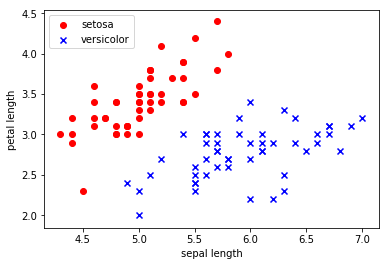

In [34]:
# Visualize data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [35]:
# Train one perceptron to classify data
percp = Perceptron(eta=0.1, num_epochs=50)
percp.fit(X, y)

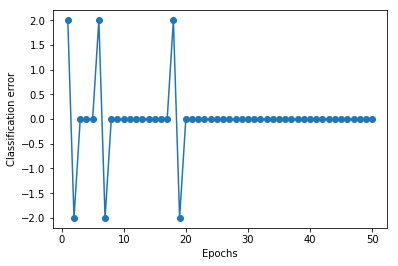

In [36]:
# Plot training error
plt.plot(range(1, len(percp.errors_) + 1), percp.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Classification error')
plt.show()

In [37]:
# Option, import from sklearn
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=50, eta0=0.01, random_state=0)
ppn.fit(X, y)
y_pred = ppn.predict(X)
print('Misclassified samples: %d' % (y != y_pred).sum())

Misclassified samples: 0


/home/eromran/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
